# `Классификация фишинговых криптовалютных аккаунтов`

Курсовая работа по дисциплине `Технологии анализа данных и машинного обучения` по теме "Классификация фишинговых криптовалютных аккаунтов" на примере датасета Ethereum Phishing Transaction network (https://www.kaggle.com/datasets/xblock/ethereum-phishing-transaction-network).

Выполнил студент группы ПИ20-3 Выродов Артём

## Введение в предметную область

- #### Краткие сведения о технологии блокчейн, криптовалютах и платформе Ethereum

Блокчейн - технология, позволяющая хранить и передавать информацию без необходимости централизованного контроля. Она основана на создании цепочки блоков, которые содержат информацию о транзакциях или событиях, происходящих в системе. Каждый блок содержит уникальный код - хэш, который связывает его с предыдущим блоком и обеспечивает целостность системы.

Криптовалюта - это наиболее известное применение блокчейна, цифровая валюта, которая использует криптографические методы для обеспечения безопасности и анонимности транзакций. Она является одним из применений технологии блокчейн, которая позволяет создавать децентрализованные и автономные системы для обмена цифровыми активами.

Одна из самых распространённых реализаций блокчейна, обладающих собственной криптовалютой - проект Ethereum - это платформа для создания децентрализованных приложений. Она позволяет создавать смарт-контракты - автономные программы, выполняющие действия, определенные участниками сети. Кроме того, Ethereum использует криптовалюту под названием Ether (ETH) - "Эфир" - для оплаты транзакционных сборов и вознаграждения валидационных узлов, которые обрабатывают транзакции и поддерживают работу сети.

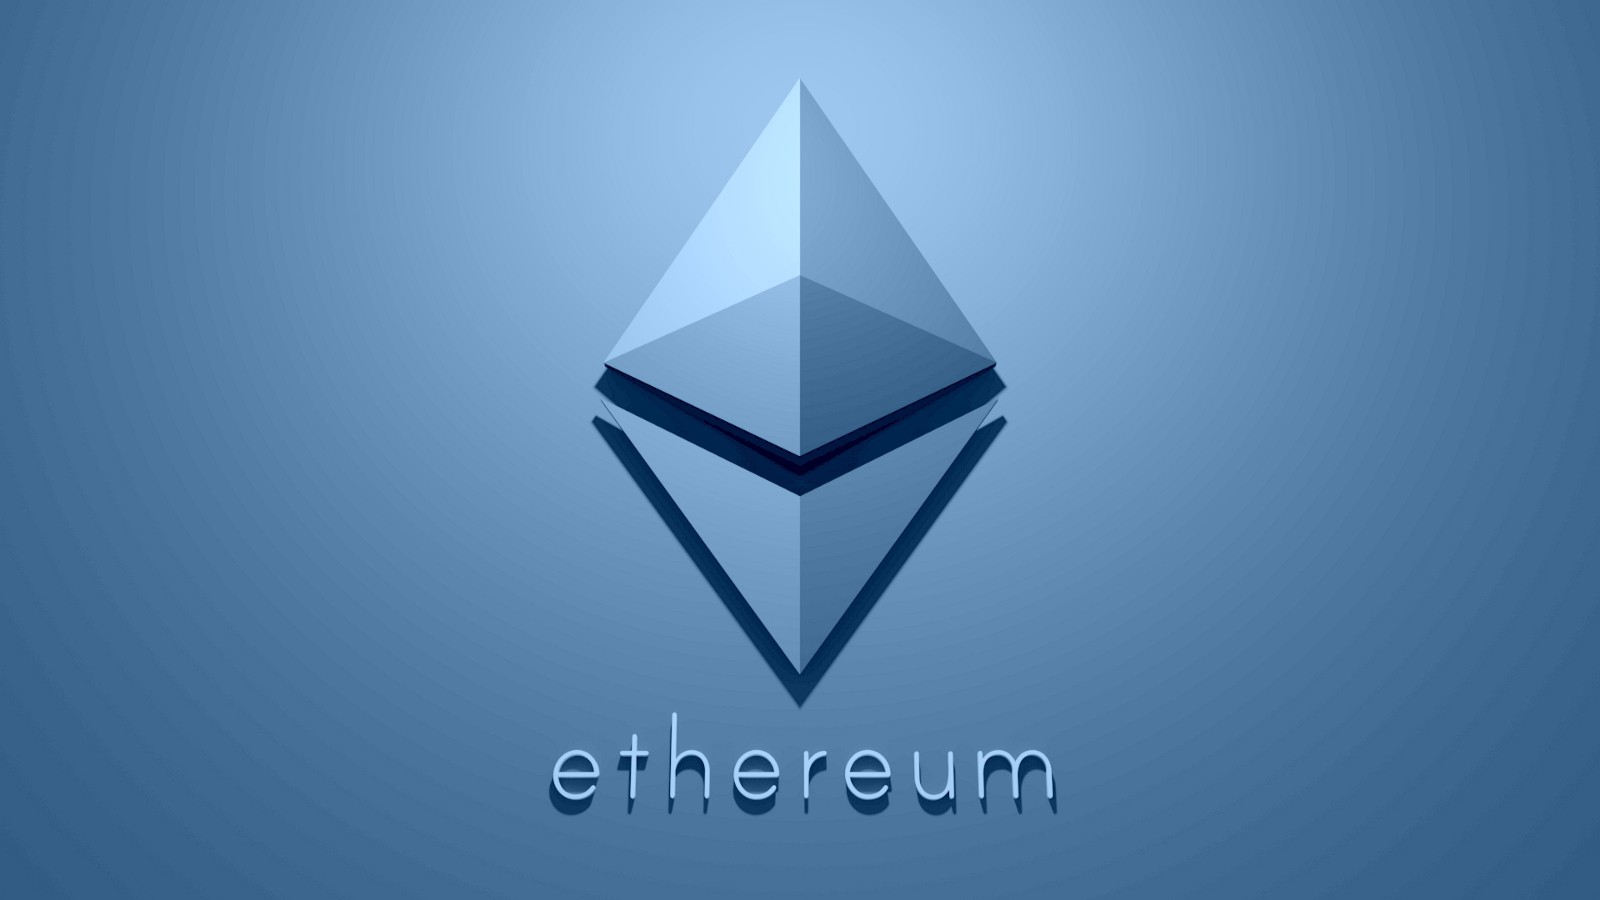

- #### Угроза фишинговых аккаунтов для сети

В Ethereum аккаунты могут быть двух видов - внешние аккаунты (аккаунты пользователей) и аккунты смарт-контрактов. Каждый аккаунт в Ethereum имеет адрес, который представляет собой уникальную комбинацию 40 шестнадцатеричных символов. Этот адрес используется для отправки и получения токенов между аккаунтами. В рамках данной работы понятие аккаунт, адрес и кошелёк - взаимозаменяемы.

Фишинговые аккаунты в блокчейн сетях, таких как Ethereum, представляют серьезную угрозу для пользователей. Эти аккаунты могут использоваться злоумышленниками для создания поддельных транзакций и обмана пользователей, что может привести к потере доступа к криптовалютным счетам и утечке финансовых средств. Фишинговые адреса также могут использоваться для проведения атак на смарт-контракты, которые работают на блокчейне, с целью изменения логики контракта и внесения изменений в блокчейн, в следствие чего платформа может потерпеть огромные экономические потери. 

Фишинговые адреса могут действовать путем создания поддельных транзакций, включая переводы средств, и использования спам-рассылок для привлечения новых пользователей. Они могут также использоваться для проведения атак на смарт-контракты, которые работают на блокчейне, с целью изменения логики контракта и внесения изменений в блокчейн. Фишинговые адреса могут также использоваться для создания мошеннических ICO (Initial Coin Offering), которые обманывают инвесторов и могут привести к значительным финансовым потерям.

Поэтому важно уметь определять фишинговые адреса в блокчейн сетях. Для этого могут использоваться различные методы, включая анализ транзакций и паттернов поведения адресов, идентификацию схожих адресов, а также анализ контента и контекста сообщений, отправляемых фишинговыми адресами.

Таким образом, классификация фишинговых криптовалютных адресов является важной задачей, которая может помочь защитить пользователей блокчейн сетей от мошеннических действий и потерь финансовых средств. Использование нейронных сетей для классификации фишинговых адресов может быть особенно эффективным, так как это позволит автоматизировать процесс определения подозрительных адресов и повысить точность классификации.

- #### Набор данных и формулировка задачи

Именно первый тип (внешние аккаунты) является точкой данных в рассматриваемом датасете. 

В датасете собраны фишинговые узлы из Ethereum, которые были промаркированы на обозревателе сети Etherscan. Начиная с этих фишинговых узлов, создатели датасета "просканировали" огромную транзакционную сеть Ethereum, используя поиск в ширину. 

Этот набор данных хранится в формате pickle (`MulDiGraph.pkl`) и является объектом библиотеки networkx - графом. В приведённом наборе данных аккаунты и транзакции в Ethereum рассматриваются как узлы и ребра, таким образом, обнаружение фишинговых учетных записей может быть смоделировано как проблема классификации узлов. Каждый узел представляет собой адрес с атрибутом `isp`, указывающим, является ли он фишинговым узлом. Каждое ребро имеет два атрибута - сумму транзакции и время её исполнения. По описанию на Kaggle набор данных содержит 2973489 узлов, 13551303 ребра и 1165 узлов, помеченных как фишинговые.

## Описательный анализ данных (Exploratory Descriptive Analisys - EDA)

Для описания датасета используется библиотека NetworkX, поскольку она предоставляет понятный интерфейс и большой функционал для понимания структуры графа, описания его особенностей и деталей о вершинах и рёбрах.

In [134]:
import datetime
import pickle
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_pickle(fname):
    with open(fname, 'rb') as f:
        return pickle.load(f)

In [3]:
start = datetime.datetime.now()
G = load_pickle('MulDiGraph.pkl')
finish = datetime.datetime.now()
f'Время загрузки графа: {finish - start}'

'Время загрузки графа: 0:00:29.082298'

### 0. Тип графа

Проверим, что граф транзакций является направленным. Направление транзакций может указывает на то, кто является источником средств, и кто является их получателем. Очевидно, что направление транзакций - ключевой фактор при анализе и обнаружении аномалий (фишинга) в переводах Эфира. В случае ненаправленного графа невозможно было бы обнаруживать перемещение криптовалюты с адреса на адрес и выявлять мошенничество. 

In [4]:
nx.is_directed(G)

True

### 1. Содержание графа

Выведем все атрибуты узлов и рёбер, чтобы "заглянуть" внутрь датасета - определить все признаки, которые могут влиять на решение поставленной задачи. В то же время, проводим сверку, что заявленные в описании характеристики элементов графа действительно таковы. 

In [5]:
%%time
nodes_attrs = G.nodes.data() # список кортежей [(<имя узла>, <атрибуты узла>),(...)]
nodes_attrs = set().union(*(attrs.keys() for attrs in [node[1] for node in nodes_attrs]))
print(f'Все возможные атрибуты узлов: {nodes_attrs}\n')

Все возможные атрибуты узлов: {'isp'}

CPU times: user 4.19 s, sys: 476 ms, total: 4.66 s
Wall time: 4.78 s


In [6]:
%%time
edges_attrs = G.edges.data() # список кортежей [(<имя узла 1>, <имя узла 1>, <атрибуты узла>),(...)]
edges_attrs = set().union(*(attrs.keys() for attrs in [edge[2] for edge in edges_attrs]))
print(f'Все возможные атрибуты рёбер: {edges_attrs}\n')

Все возможные атрибуты рёбер: {'amount', 'timestamp'}

CPU times: user 21.6 s, sys: 1.51 s, total: 23.1 s
Wall time: 24 s


Подтвердилась информация о том, что для каждого узла - адреса в Ethereum мы знаем фишинговый ли он (атрибут `isp`), а для каждого ребра (транзакции) известна сумма перевода `amount` и время `timestamp`.

Выведем для примера один из узлов и одно из рёбер, убедимся в типе данных:

In [7]:
for i, node in enumerate(nx.nodes(G)):
    print(node)
    print(G.nodes[node], f'Тип атрибута ISP: {type(G.nodes[node]["isp"])}')
    break

for i, pair_nodes in enumerate(nx.edges(G)):
    u, v = pair_nodes
    edge = G[u][v][0]
    print(f'Amount: {edge["amount"]}, тип  {type(edge["amount"])}')
    print(f'Timestamp: {edge["timestamp"]}, тип  {type(edge["timestamp"])}')
    break

0x1f1e784a61a8ca0a90250bcd2170696655b28a21
{'isp': 0} Тип атрибута ISP: <class 'int'>
Amount: 2.3446233, тип  <class 'float'>
Timestamp: 1526454086.0, тип  <class 'float'>


### 2. Размер датасета

Оценим общее количество вершин и ребер в графе, а также среднюю и максимальную степень вершин. Это поможет понять, насколько сложной будет задача обучения графовой нейронной сети и какие алгоритмы стоит раcсматривать для решения.

In [8]:
print('Количество вершин:', G.number_of_nodes())
print('Количество рёбер:', G.number_of_edges())

Количество вершин: 2973489
Количество рёбер: 13551303


Граф очень большой, и обучение на всё датасете может быть очень долгим или невозможным в зависимости от имеющейся вычислительной мощности. Рассмотрим шаги, которые могут привести к уменьшению размера датасета, при этом не удаляя из него значимых для обучения деталей:

- Стоит проверить наличие изолированных вершин (вершин, которые не связаны с другими вершинами ребром). Если такие вершины есть, то их можно удалить из графа, так как они не будут участвовать в обучении модели.

- Стоит проанализировать распределение степеней вершин и определить наиболее важные вершины с точки зрения обучения модели.

- Проверить наличие циклов в графе и определить их роль в обучении модели.

- Проверить наличие мультиребер (несколько ребер между одними и теми же вершинами) и петель (ребро, соединяющее вершину саму с собой) и определить их роль в обучении модели.

- Проверить наличие подграфов (сообществ) в графе и определить их роль в обучении модели.

### 3. Целевая переменная

Для будущей модели целевой переменной является единственный атрибут узла - `isp`, принимающий булевое значение (is phishing) (сама переменная - типа `integer`) и идентифицирующий фишинговые аккаунты. 

Оценим распределение этой переменной в датасете и определим, есть ли дисбаланс классов.

In [9]:
%%time
isp_cnt = 0
phishing_nodes = []
for node in nx.nodes(G):
    isp_cnt += G.nodes[node]['isp']
    if G.nodes[node]['isp']:
        phishing_nodes.append(node)
print(f'Количество фишинговых вершин: {isp_cnt}')

Количество фишинговых вершин: 1165
CPU times: user 2.03 s, sys: 48.3 ms, total: 2.08 s
Wall time: 2.09 s


In [10]:
print(f'Процент фишинговых адресов от общего количества: {1165 / 2973489 * 100 :.2f}%')

Процент фишинговых адресов от общего количества: 0.03918%


Таким образом, датасет является чрезвычайно несбалансированным. Необходимо, принимая шаги, описанные в пунте "2. Размер датасета", или увеличить число фишинговых аккаунтов, или сократить количество "обычных" адресов. 

### 4. Структура графа

Проанализируем, какие характеристики графа могут быть полезными для предсказания целевой переменной, а также какие методы и алгоритмы могут быть использованы для анализа графа транзакций.

В направленном графе за степень вершины принимаем количество рёбер, выходящих из вершины:

In [11]:
degrees = dict(G.out_degree())

In [12]:
print(f'Средняя степень вершин: {sum(degrees.values())/G.number_of_nodes() :.2f}')
print(f'Максимальная степень вершин: {max(degrees.values())}')

Средняя степень вершин: 4.56
Максимальная степень вершин: 102480


#### I. Принимая во внимание, что максимальная степень вершин в 20000 раз больше средней, очевидно имеется некоторый "локальный" центр, объединяющий множество узлов. Рассмотрим подробнее сколько количественно таких вершин с высокими степенями:

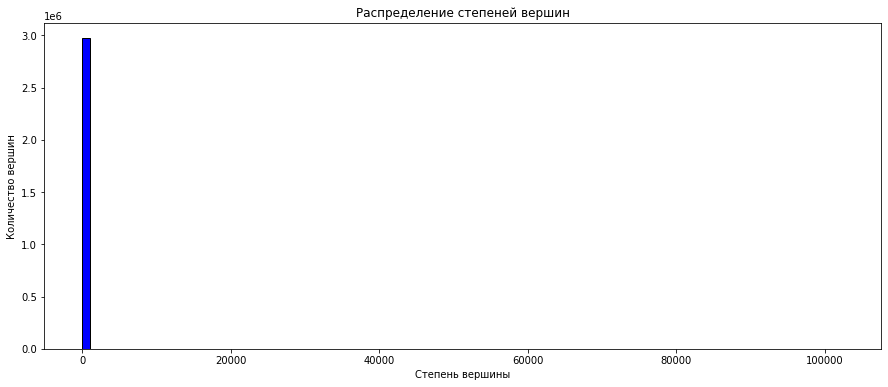

In [13]:
fig = plt.figure(figsize=(15, 6))
plt.hist(list(degrees.values()), bins=100, alpha=1, color='b', edgecolor='black')
plt.xlabel('Степень вершины')
plt.ylabel('Количество вершин')
plt.title('Распределение степеней вершин');

Построим диаграмму "Ящик с усами", чтобы увидеть выбросы в распределении:

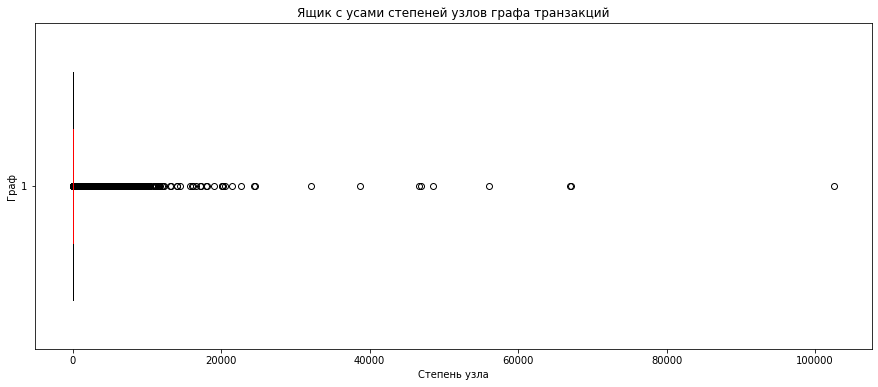

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.boxplot(degrees.values(), vert=False, widths=0.7, notch=True, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           whiskerprops=dict(color='black'),
           medianprops=dict(color='red'),
           capprops=dict(color='black'))

ax.set_xlabel('Степень узла')
ax.set_ylabel('Граф')
ax.set_title('Ящик с усами степеней узлов графа транзакций');

10 наиболее важных вершин графа:

In [15]:
top10_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]
for addr, degree in top10_degrees:
    print(f'Аккаунт {addr}, связность (исходящих транзакций): {degree}')

Аккаунт 0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98, связность (исходящих транзакций): 102480
Аккаунт 0xea674fdde714fd979de3edf0f56aa9716b898ec8, связность (исходящих транзакций): 67183
Аккаунт 0x2b5634c42055806a59e9107ed44d43c426e58258, связность (исходящих транзакций): 67031
Аккаунт 0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be, связность (исходящих транзакций): 56124
Аккаунт 0x5e575279bf9f4acf0a130c186861454247394c06, связность (исходящих транзакций): 48570
Аккаунт 0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5, связность (исходящих транзакций): 46971
Аккаунт 0x2984581ece53a4390d1f568673cf693139c97049, связность (исходящих транзакций): 46602
Аккаунт 0x4b01721f0244e7c5b5f63c20942850e447f5a5ee, связность (исходящих транзакций): 38732
Аккаунт 0x59a5208b32e627891c389ebafc644145224006e8, связность (исходящих транзакций): 32052
Аккаунт 0xe03c23519e18d64f144d2800e30e81b0065c48b5, связность (исходящих транзакций): 24620


#### II. Поиск изолированных вершин (если эти аккаунты не фишинговые, от них можно избавиться)

In [16]:
%%time
isolates = nx.isolates(G)
print(f'Найдено {len(list(isolates))} полностью изолированных вершин.')

Найдено 0 полностью изолированных вершин.
CPU times: user 4.46 s, sys: 4.56 ms, total: 4.47 s
Wall time: 4.47 s


Для направленного графа метод `nx.isolates()` возвращает только те, вершины, у которых нет и входящих, и выходящих рёбер. Проверим граф на аккаунты на те, у которых нет ИЛИ исходящих, ИЛИ входящих транзакций.

In [17]:
no_outgoing = [node for node in G.nodes() if not list(G.successors(node))]
print(f'Аккаунтов без исходящих транзакций - {len(no_outgoing)}')

Аккаунтов без исходящих транзакций - 860396


In [18]:
no_incoming = [node for node in G.nodes() if not list(G.predecessors(node))]
print(f'Аккаунтов без входящих транзакций - {len(no_incoming)}')

Аккаунтов без входящих транзакций - 1854465


* Преемники (successors) - это все вершины, в которые есть направленное ребро, исходящее из данной вершины.
* Предшественники (predecessors) - это все вершины, из которых есть направленное ребро, входящее в данную вершину.

Отобразим долю фишинговых аккаунтов среди всех аккаунтов, не отправлявших и не принимавших токены:

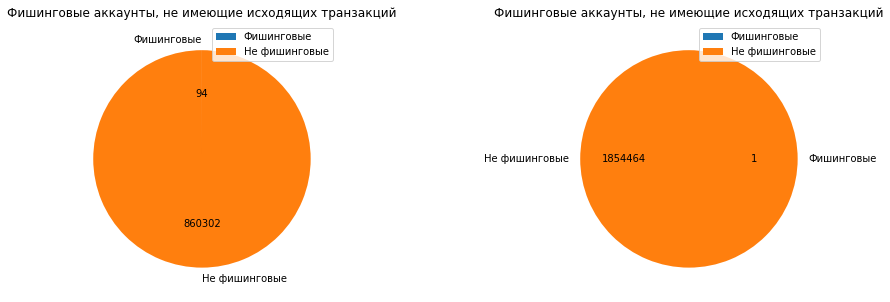

In [19]:
no_outgoing_isp_1 = len([node for node in no_outgoing if G.nodes[node]['isp'] == 1])
no_outgoing_isp_0 = len(no_outgoing) - no_outgoing_isp_1

no_incoming_isp_1 = len([node for node in no_incoming if G.nodes[node]['isp'] == 1])
no_incoming_isp_0 = len(no_incoming) - no_incoming_isp_1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.pie([no_outgoing_isp_1, no_outgoing_isp_0], labels=['Фишинговые', 'Не фишинговые'], autopct=lambda x: '{:.0f}'.format(x*sum([no_outgoing_isp_1, no_outgoing_isp_0])/100), startangle=90)
ax1.set_title('Фишинговые аккаунты, не имеющие исходящих транзакций')
ax1.legend()

ax2.pie([no_incoming_isp_1, no_incoming_isp_0], labels=['Фишинговые', 'Не фишинговые'], autopct=lambda x: '{:.0f}'.format(x*sum([no_incoming_isp_1, no_incoming_isp_0])/100))
ax2.set_title('Фишинговые аккаунты, не имеющие исходящих транзакций', loc='center')
ax2.legend();

Эта информация позволяет сделать вывод, что даже фишинговые акканунты могут эксплуатироваться, проводя транзакции только "в одну сторону". Поэтому гипотеза о том, что мы можем уменьшить размер датасета за счет изолированных вершин, или что направленность транзакций может являться хорошим признаком для идентификации фишинговых узлов не подтвердилась.

#### III. Проанализируем степени фишинговых вершин. Насколько много транзакций совершалось со счетами мошеннических аккаунтов.

Узнаем степень каждой фишинговой вершины:

In [20]:
isp_degrees = {}
for node in nx.nodes(G):
    if G.nodes[node]['isp'] == 1:
        isp_degrees[node] = G.degree(node) # рассматриваем и входящие и исходящие транзакции

isp_degrees

{'0xbbfaf27674c2eb5d13edc58a40081248d13dcfeb': 8,
 '0x40949225c4a1745a9946f6aaf763241c082cb9ac': 489,
 '0xe00e1f7117a69c34694ac1815177c93491fc448f': 286,
 '0xaf5bda8f8b954b03474305fd148c8361cad4d2cd': 67,
 '0x4a8b69bd663e6967a118456a30a51495bdba704c': 92,
 '0x685445fe51b31790538890a6468851afbf7a0519': 167,
 '0x5208d7f63a089906889a5a9caed81e9c889e64f8': 296,
 '0xea3a8bd1a99e16160832d6b473ce06c1058dff7e': 485,
 '0x0c91ba2e9d7984015d72249345a0cefb8328a930': 8,
 '0x3b5744c7f340e0d2dcf7a072a4c963b9a43c982b': 194,
 '0x20a7a56175872acf6d3a8566eb7af76e01900c84': 73,
 '0x44a7ff01f7d38c73530c279e19d31527bdcf8c78': 97,
 '0x0e0ba79cb92e07555ef7a3fe9e18ba33dd0b6d29': 10,
 '0x69f8e87518129498da751f26ea2309db05e7270b': 393,
 '0xc0daeff8088d77dfecbfe525af535830be607bd2': 210,
 '0x26f7eb488661c33c43089ad61944f3231222b32f': 9,
 '0x33f74739ce6be3b2c38af76f5adb3866cb4784c4': 322,
 '0x474057adf42f9f955e86aa1142740f9d7763e41e': 684,
 '0x44525c8dd44b9d470937cc9e7a0275eb14c7b01d': 82,
 '0xe8868e87aaa4a0d07516

In [21]:
# / 2 чтобы не учесть дважды одни и те же транзакции
print(f'Средняя степень фишинговых вершин: {sum(isp_degrees.values())/len(isp_degrees.values())/2}') 

Средняя степень фишинговых вершин: 25.86266094420601


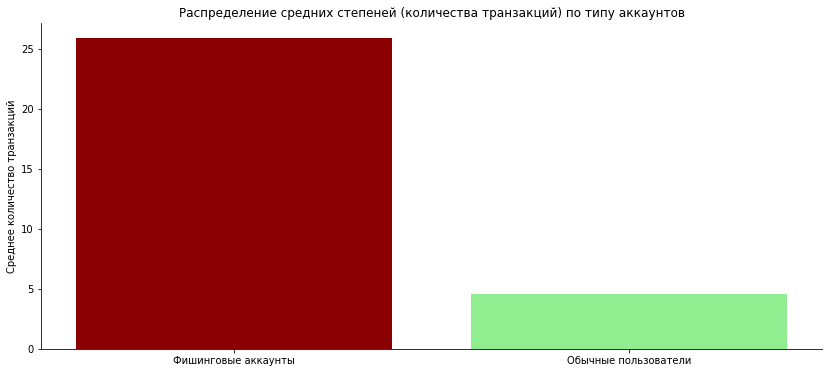

In [22]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(['Фишинговые аккаунты', 'Обычные пользователи'], 
       [sum(isp_degrees.values())/len(isp_degrees.values())/2, sum(degrees.values())/G.number_of_nodes()], 
       color=['darkred', 'lightgreen'])
ax.set_title('Распределение средних степеней (количества транзакций) по типу аккаунтов')
ax.set_ylabel('Среднее количество транзакций')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

Таким образом, среднее число транзакций, совершаемое фишинговыми аккаунтами намного превышает среднее значение по сети. Хотя это и не удивительно, ведь акт мошенничества невозможно совершить без определённом подготовительной работы в сети, этот признак может являться достаточно весомым для обучения модели. 

In [23]:
f'Наибольшее число транзакций, проводимых фишинговых аккаунтом: {max(isp_degrees.values())//2}'

'Наибольшее число транзакций, проводимых фишинговых аккаунтом: 2616'

#### IV. Определим наличие циклов в графе транзакций.

In [24]:
cycles = nx.find_cycle(G)
if cycles:
    phishings_in_cycles = set()
    print(f'В графе есть циклы.')
    for txn in cycles:
        ph_nodes = set(txn).intersection(phishing_nodes)
        if ph_nodes:
            phishings_in_cycles.add(ph_nodes)
    print(f'В них участвует {len(phishings_in_cycles)} фишинговых аккаунтов.')

В графе есть циклы.
В них участвует 0 фишинговых аккаунтов.


#### V. Определим наличие мультирёбер и петель.

Это позволит определить повторяющиеся транзакции и транзакции по пересылке токенов самому себе.

In [25]:
# выводим все мультиребра
n_multi_edges = 0
multi_edges = []
for u, v, k in G.edges(keys=True):
    if G.number_of_edges(u, v) > 1:
        multi_edges.append((u, v))
        n_multi_edges += 1
        
f'В графе {n_multi_edges} мультирёбер'

'В графе 9483138 мультирёбер'

In [26]:
f'{n_multi_edges/G.number_of_edges()*100:.2f}% транзакций в датасете не были уникальными'

'69.98% транзакций в датасете не были уникальными'

In [27]:
%%time
nodes_with_selfloops = list(nx.nodes_with_selfloops(G))
if nodes_with_selfloops:
    print(f'В датасете {len([i for i in nodes_with_selfloops])} аккаунтов проводили транзакции сами себе.')
    print(f'Из них фишинговых - {len([n for n in nodes_with_selfloops if n in phishing_nodes])}')
    n_self_txns = 0
    for edge in G.edges:
        if edge[0] == edge[1]:
            n_self_txns += 1
    print(f'Всего транзакций самому себе было: {n_self_txns}.')

В датасете 1321 аккаунтов проводили транзакции сами себе.
Из них фишинговых - 22
Всего транзакций самому себе было: 5926.
CPU times: user 5.7 s, sys: 5.12 ms, total: 5.71 s
Wall time: 5.71 s


Таким образом, фишинговые аккаунты вписываются в паттерн поведения большинства и не выделяются по критерию переводов "самому себе".

Теперь рассмотрим детальнее мультирёбра. Какой процент фишинговых аккаунтов (если он вообще не нулевой) участвовал в повторяющихся переводах. Гипотеза состоит в том, что мошеннические действия должны быть неоднократны.

In [28]:
repeated_phishings = set()
for edge in multi_edges:
    repeated_nodes = set(edge).intersection(phishing_nodes)
    if repeated_nodes:
        repeated_phishings.update(repeated_nodes)
print(f'{len(repeated_phishings)/isp_cnt*100:.2f}% фишинговых аккаутов совершали повторяющиеся транзакции')

62.75% фишинговых аккаутов совершали повторяющиеся транзакции


Имеем, что более половины фишинговых аккаутов совершали транзакции на одни и те же адреса. Это может быть подходящим признаком для идентификации фишинговых узлов.

#### VI. Подграфы (сообщества) в графе и наличие в них фишинговых аккаунтов.

Выделение сообществ может быть полезным при работе с графовыми нейронными сетями, которые используют графы для представления данных. Выделение сообществ может помочь улучшить представление данных в графовых нейронных сетях, позволяя модели сосредоточиться на более узких и информативных подграфах графа, что может привести к лучшей производительности и более точным предсказаниям.

Алгоритм поиска сообществ Louvain, также известный как метод модулярности, является одним из наиболее популярных и эффективных алгоритмов обнаружения сообществ в сетях. Он был разработан в 2008 году.

Алгоритм Лувена использует метрику модулярности для оценки качества разделения графа на сообщества. Модулярность определяет, насколько хорошо сеть поделена на сообщества путем сравнения количества ребер внутри сообществ с количеством ребер между сообществами. Если модулярность высока, значит, разделение сети на сообщества является хорошим.

Алгоритм Louvain работает в два этапа. На первом этапе он применяет жадный алгоритм, который максимизирует модулярность в каждом сообществе, путем слияния близлежащих узлов. На втором этапе он объединяет сообщества, полученные на первом этапе, в более крупные сообщества, чтобы максимизировать общую модулярность.

In [29]:
%%time
from networkx.algorithms import community

partitions = community.louvain_communities(G)
print(f'Обнаружено {len(partitions)} сообществ (подграфов)\n')

Обнаружено 15719 сообществ (подграфов)

CPU times: user 5min 52s, sys: 48.9 s, total: 6min 41s
Wall time: 7min 10s


Очистка датасета от ненужных узлов и рёбер:
1. Обход сообществ
2. Определение подграфов без фишинговых узлов
3. Удаление из графов узлов, которые есть в таких сообществах

In [30]:
%%time
parts_wo_phishing = []
for i, partition in enumerate(partitions):
    contain_phishing = False
    for node in partition:
        if G.nodes[node]['isp'] == 1:
            contain_phishing = True
            break
    if not contain_phishing:
        parts_wo_phishing.append(i)
        
print(f'Сообществ без фишинговых узлов: {len(parts_wo_phishing)}\n')

Сообществ без фишинговых узлов: 14961

CPU times: user 1.92 s, sys: 840 ms, total: 2.76 s
Wall time: 3.03 s


Сформируем множество, содержащие все узлы, которые мы можем удалить:

In [31]:
nodes4deleting = set()
for i in parts_wo_phishing:
    for node in partitions[i]:
        nodes4deleting.add(node)
        
print(len(nodes4deleting))

2445160


In [32]:
start = datetime.datetime.now()

G_backup = G.copy()
G.remove_nodes_from(nodes4deleting)
print(f'После удаления выделенных сообществ граф содержит {G.number_of_nodes()} узлов и {G.number_of_edges()} рёбер')
print(f'Было удалено {(G_backup.number_of_nodes() - G.number_of_nodes())/G_backup.number_of_nodes()*100:.1f}% узлов и {(G_backup.number_of_edges() - G.number_of_edges())/G_backup.number_of_edges()*100:.1f}% рёбер')

finish = datetime.datetime.now()
f'Время выполнения: {finish - start}'

После удаления выделенных сообществ граф содержит 528329 узлов и 2065452 рёбер
Было удалено 82.2% узлов и 84.8% рёбер


'Время выполнения: 0:04:32.990122'

Проверим, что в графе по прежнему нет изолированных вершин:

In [35]:
len(list(nx.isolates(G)))

0

Сохраним граф в формате `.gexf` для последующей визуализации в редакторе Gephi.

In [664]:
%time nx.write_gexf(G, 'g_copy.gexf')

CPU times: user 1min 37s, sys: 1min 28s, total: 3min 6s
Wall time: 3min 57s


Визуализируя граф в Gephi, отфильтровав только фишинговые аккаунты, можем увидеть, что лишь единицы проводили транзакции между собой. В основном они не связаны.

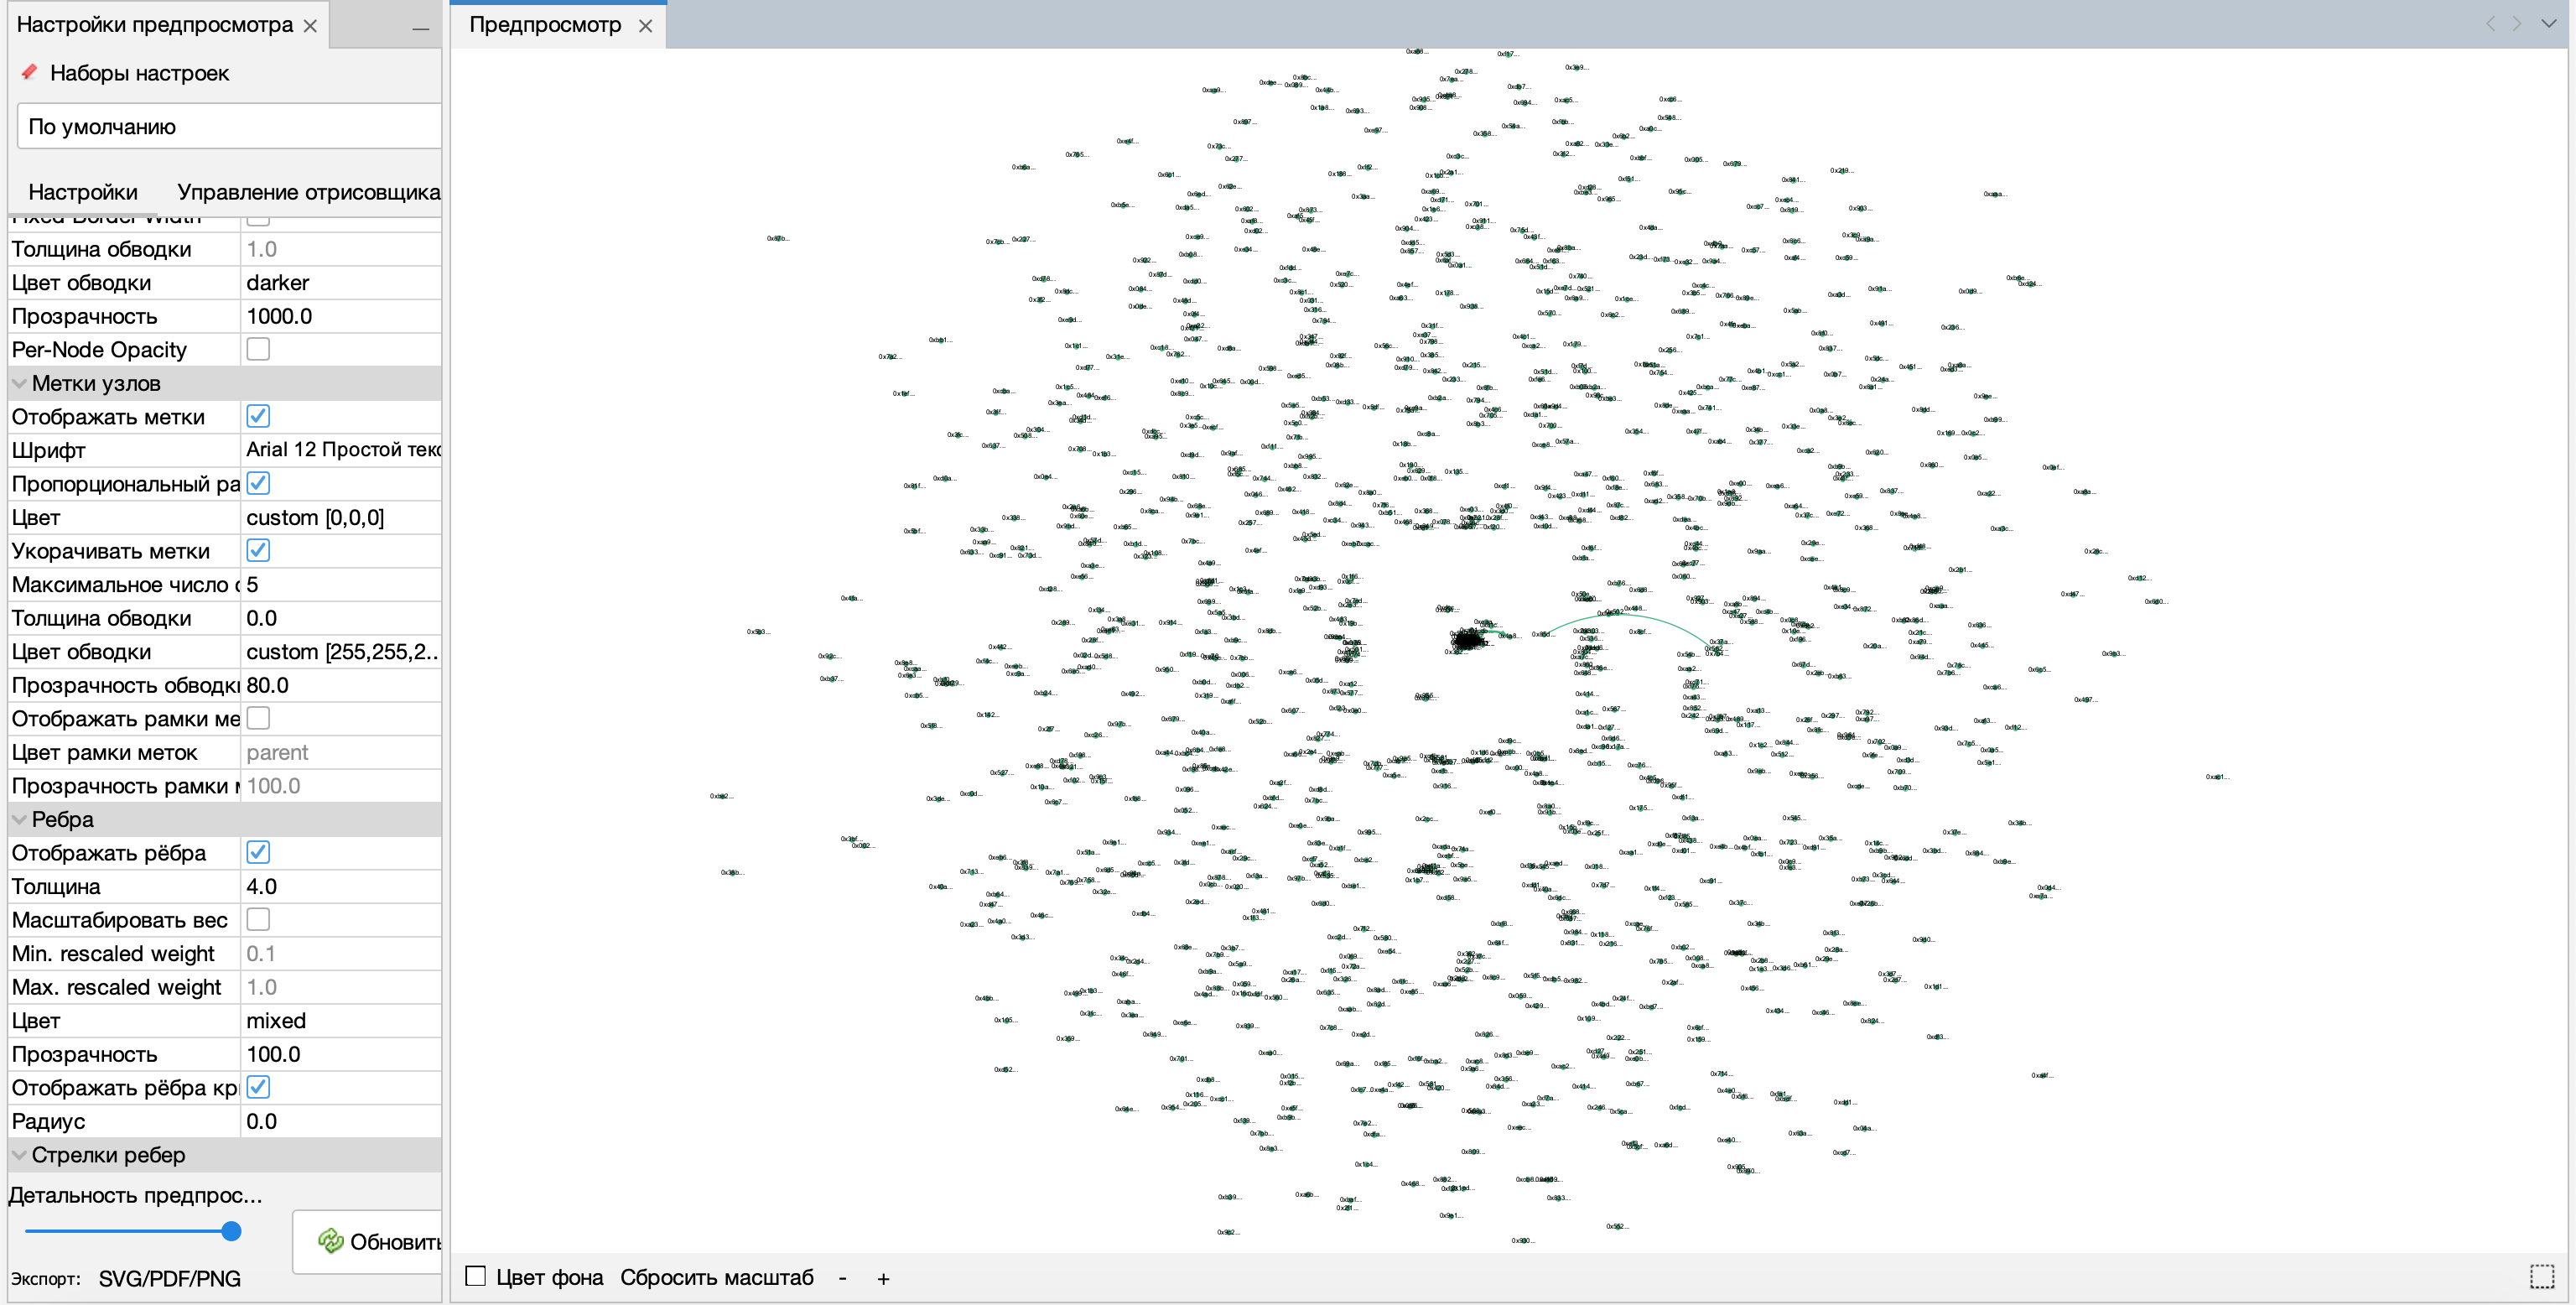

## Архитектуры нейронных сетей для работы с графами

Для решения задачи классификации графовых узлов распространены следующие классы моделей:

1. Графовые нейронные сети (Graph Neural Networks, GNNs) - это класс моделей, разработанных специально для работы с графами. Они обрабатывают графы, используя сверточные слои, агрегирующие слои и пространственную инвариантность.

2. Модели на основе узловых эмбеддингов - это модели, которые сначала преобразуют каждый узел в вектор, называемый узловым эмбеддингом, а затем используют эти эмбеддинги для предсказания атрибутов узлов. Примерами таких моделей являются node2vec и DeepWalk.

3. Модели на основе метрик - это модели, которые используют метрики для измерения сходства между узлами в графе. Затем они используют эти метрики для предсказания атрибутов узлов. Примером такой модели является модель на основе косинусного расстояния.

В данной работе будут созданы различные варианты первого типа НН - Графовых нейросетей. Это обусловлено прежде всего их специализацией на работе с графами, сохранением связей между рёбрами внутри. Кроме того, они достаточно легко расширяемы.

## Создание датасета из графа

Преобразование графа `NetworkX` в датасет для обучения модели. 
Особенности:

    - labels - атрибут узла `isp`, который нам необходимо предсказывать
    - Необходимо учитывать рёберные атрибуты в качестве признаков для классификации узлов (`edge_attrs`)
    - edge_index - индексы рёбер в формате [исходная вершина, конечная вершина]

### Конструирование признаков (Feature engineering)

Если у узлов графа нет атрибутов, то можно использовать следующие признаки в качестве x для GCN:

    One-hot вектора узлов. Можно создать one-hot вектор для каждого узла графа и использовать их в качестве входных признаков. Однако, этот подход неэффективен при большом количестве узлов, так как one-hot вектора будут иметь очень большую размерность.

    Степени узлов. Для каждого узла можно вычислить его степень (количество соседей) и использовать эту информацию в качестве признаков. Этот подход более эффективен, так как степени узлов могут помочь учесть структуру графа.

    Векторы соседей. Можно использовать векторы, составленные из признаков соседей узла, как входные признаки для каждого узла. Этот подход также учитывает структуру графа, но может быть сложным в реализации и требует большого количества вычислений.

    Случайные признаки. Можно случайным образом назначить признаки для каждого узла. Этот подход не учитывает структуру графа, но может быть полезен, если никакой другой информации о графе нет.

In [37]:
import torch

В отстутствии атрибутов у узлов, в качестве признаков будем использовать входящие и исходящие степени вершин графа.

In [38]:
start = datetime.datetime.now()

in_degrees = pd.DataFrame.from_dict(dict(G.in_degree()), orient='index')
in_degrees.reset_index(inplace=True)
in_degrees.columns = ['account', 'in_degree']

out_degrees = pd.DataFrame.from_dict(dict(G.out_degree()), orient='index')
out_degrees.reset_index(inplace=True)
out_degrees.columns = ['account', 'out_degree']

node_degrees = pd.merge(in_degrees, out_degrees, left_on='account', right_on='account')

x = torch.tensor(node_degrees[['in_degree', 'out_degree']].to_numpy())

finish = datetime.datetime.now()
f'Время выполнения: {finish - start}'

'Время выполнения: 0:00:01.785734'

In [39]:
start = datetime.datetime.now()

# Переносим значение 'isp' в data.y
labels = [G.nodes[node_id]['isp'] for node_id in G.nodes()]
y = torch.tensor(labels, dtype=torch.long)

finish = datetime.datetime.now()
f'Время выполнения: {finish - start}'

'Время выполнения: 0:00:02.185278'

In [40]:
start = datetime.datetime.now()

# Добавляем реберные атрибуты в data.edge_attr
edge_attrs = [[G.edges[source, target, 0]['amount'], G.edges[source, target, 0]['timestamp']] 
               for source, target in G.edges()]
edge_attr_tensor = torch.tensor(edge_attrs, dtype=torch.float)

finish = datetime.datetime.now()
f'Время выполнения: {finish - start}'

'Время выполнения: 0:00:06.325790'

Чтобы перевести строку - адрес в блокчейне Ethereum - в число, присвоим каждому адресу индекс:

In [41]:
address_index = dict()
for node in G.nodes:
    address_index[node] = len(address_index.keys())

In [42]:
start = datetime.datetime.now()

# Получаем индексы ребер
edge_index = [(address_index[source], address_index[target]) for source, target in G.edges()]
edge_index = torch.tensor(edge_index, dtype=torch.long).transpose(0, 1)

finish = datetime.datetime.now()
f'Время выполнения: {finish - start}'

'Время выполнения: 0:00:01.214492'

Наиболее популярные библиотеки, которые позволяют реализовать GNN на Python - PyTorch Geometric (PyG) и Deep Graph Library (DGL). Обе они основаны на Torch, однако PyG предоставляет более понятный интерфейс (высокоуровневый API) и в последние годы в виду своего удобства обрёл большую популярность в сообществе. При этом же, DGL является более гибкой библиотекой и не ограничена сетями передачи сообщений (классические графовые свёрточные сети). 

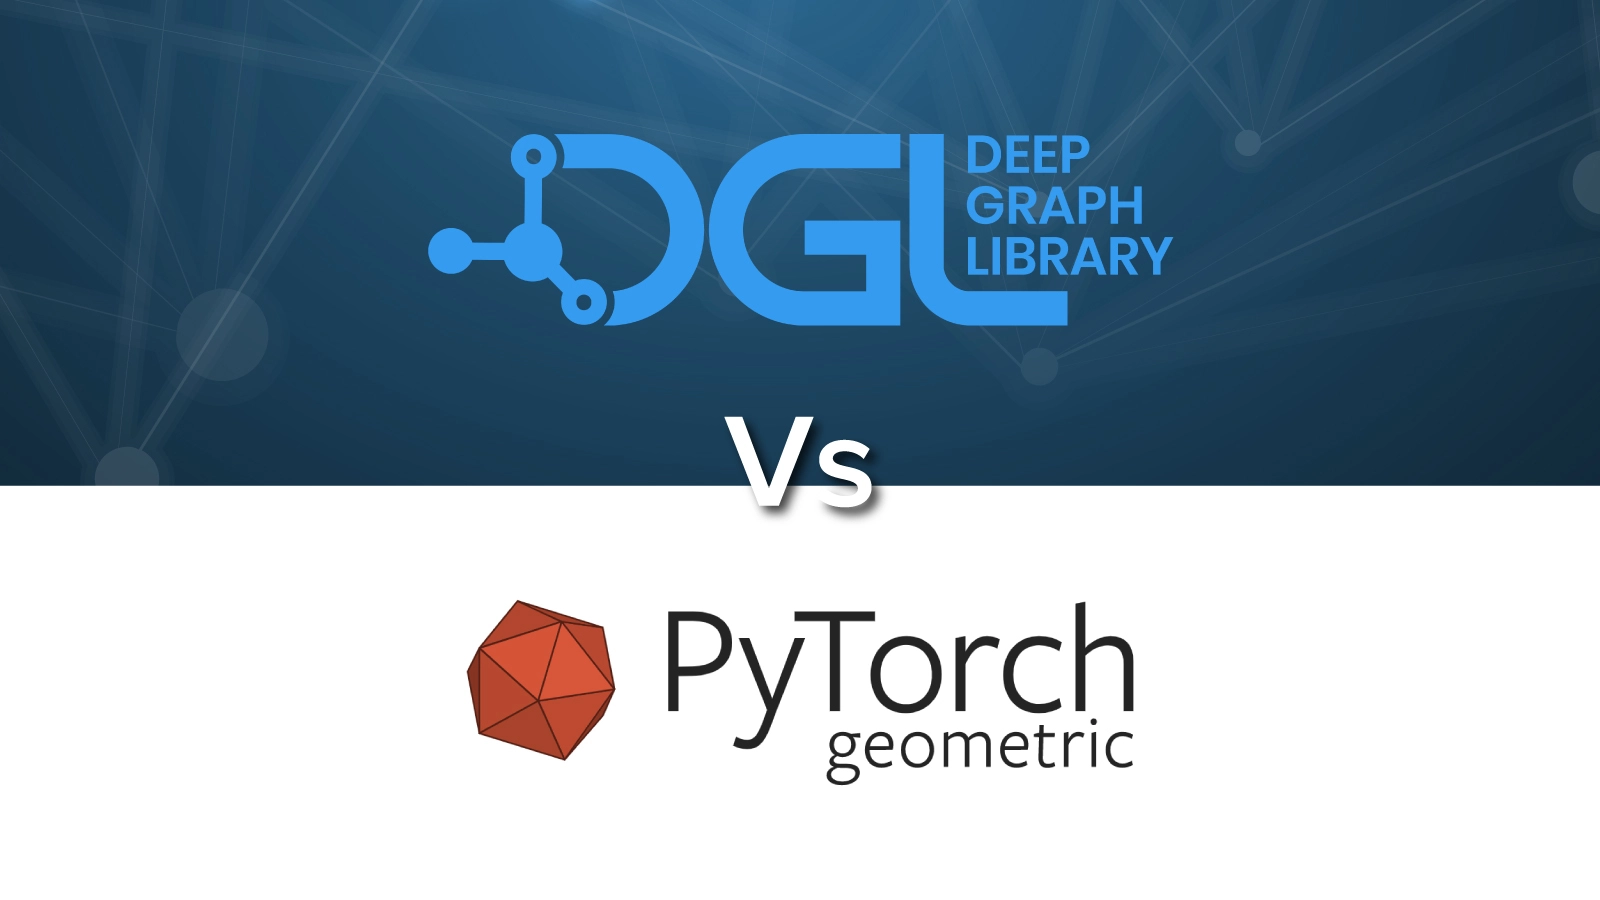

В данной работе из-за более понятного интерфейса будет использоваться PyTorch Geometric, поэтому необходимо формализованную в тензоры информацию о графе упаковать в объект Data библилиотеки PyG, который в дальнейшем и будет передаваться в нейронную сеть.

In [43]:
import torch_geometric
from torch_geometric.data import Data

Инициализируем датасет pytorch_geometric:

In [44]:
data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr_tensor, y=y)
data.num_classes = data.y.unique().size(0)
data.num_node_features = data.x.size(1)

In [45]:
data

Data(x=[528329, 2], edge_index=[2, 2065452], edge_attr=[2065452, 2], y=[528329], num_classes=2, num_node_features=2)

## Создание модели

In [46]:
print(f'Используемая версия Torch : {torch.__version__}')
print(f'Доступность Cuda-ядер для улучшения производительности: {torch.cuda.is_available()}')
print(f'Версия PyTorch Geometric: {torch_geometric.__version__}')

Используемая версия Torch : 1.13.1
Доступность Cuda-ядер для улучшения производительности: False
Версия PyTorch Geometric: 2.3.1


In [129]:
from torch_geometric.nn import GCNConv
from torch.nn import Linear
import torch.nn.functional as F
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

В качестве класса нейронной сети выбрана графовая свёрточная нейронная сеть. Спроектированная архитектура упрощённо показана на схеме:

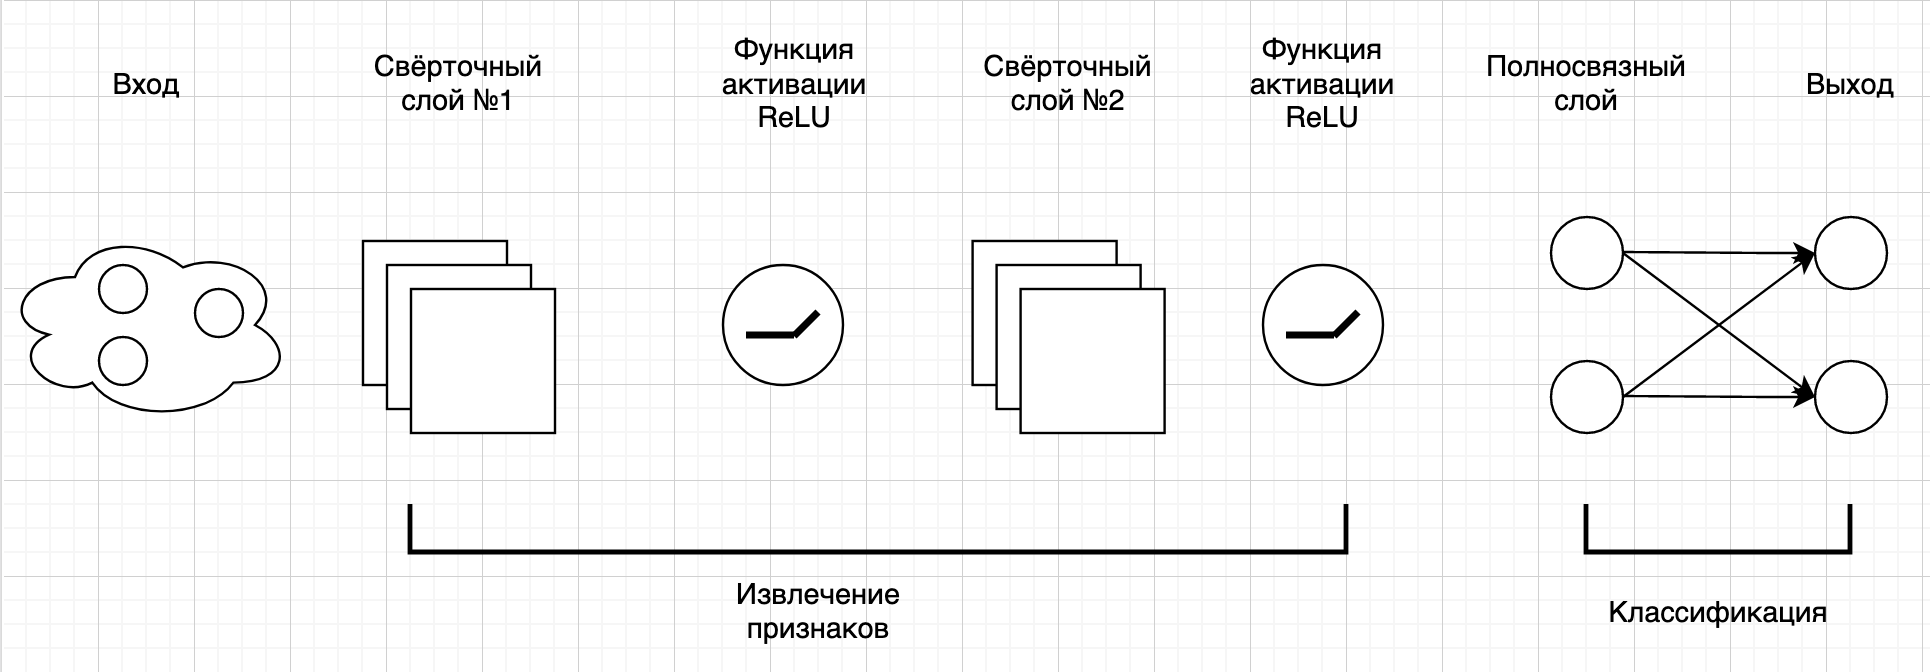

В качестве свёрточного слоя используется GCNConv. Это один из наиболее распространенных слоев в графовых нейронных сетях, который был представлен в статье "Semi-Supervised Classification with Graph Convolutional Networks" в 2017 году. Он реализует свертку на графах, используя матрицу смежности и атрибуты узлов.

GCNConv использует методы линейной алгебры, чтобы создать матрицу признаков для каждого узла, объединяя атрибуты узла и информацию о его соседях. Представление каждого узла получается путем умножения матрицы смежности на матрицу признаков и взвешивания полученных сумм с помощью весов, которые обучаются во время процесса обучения.

GCNConv является одним из наиболее простых и эффективных способов представления графов в виде векторов и используется в различных задачах классификации и кластеризации графов. 

In [110]:
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.linear = Linear(output_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_weight = data.x.float(), data.edge_index, data.edge_attr[:,0]

        x = self.conv1(x, edge_index, edge_weight)
        x = torch.relu(x).float()
        edge_weight = data.edge_attr[:,1].float()
        x = self.conv2(x, edge_index, edge_weight)
        x = torch.relu(x)
        x = self.linear(x)
        return x

## Настройки

In [122]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(data.x.shape[1], 16, data.num_classes).to(device)
# loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Для выбора определенных элементов из датасета, например, узлов или ребер графа, которые будут использоваться для обучения, валидации или тестирования модели в PyTorch Geometric используется маска.
Она позволяет определить, какие узлы или ребра графа должны быть выбраны для каждой из трех выборок.

Для разбиения графа на тренировочную и тестовую выборки, можно создаётся булева маску, где значение "True" соответствует узлам или ребрам, которые должны быть использованы для тренировки модели, а значение "False" - для тестирования модели. 

Использование маски в PyTorch Geometric позволяет более гибко и эффективно управлять выборками данных для обучения модели.

In [116]:
TRAIN_SHARE = 0.65
train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
train_mask[:int(data.num_nodes * TRAIN_SHARE)] = True
test_mask[int(data.num_nodes * TRAIN_SHARE):] = True

Процесс обучения модели представляется из себя вызов функций `train` и `test` каждую эпоху.

Функция `train` выполняет обучение GCN на выбранном пакете данных. 
1. Вначале устанавливается режим обучения.
2. Все градиенты обнуляются, чтобы избежать накопления градиентов между разными итерациями обучения. 
3. Модель получает выходные данные (предсказания) - вычисляется значение функции потерь. 
4. Обратное распространение ошибки и обновление весов с помощью оптимизатора.

Функция `test` выполняет оценку производительности модели на тестовом наборе данных. 
1. Устанавливается режим оценки. 
2. Модель получает выходные данные для всего набора данных, вычисляются предсказания модели. 
3. Далее, вычисляется точность (accuracy) модели на двух наборах данных: обучающем и тестовом. Это позволяет оценить способность модели к обобщению на новые данные. 
4. Функция возвращает точность для обоих наборов данных.

In [117]:
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()

def test():
    model.eval()
    out = model(data)
    pred = out.argmax(dim=1)
    accs = []
    for mask in [train_mask, test_mask]:
        accs.append((pred[mask] == data.y[mask]).sum().item() / mask.sum().item())
    return accs

## Обучение

В процессе самого обучения модели сохраняем оценки точности на обучающей и тестовой выборках, чтобы в дальнейшем визуализировать их на графике и сделать выводы по процессу обучения.

In [123]:
accuracies = {'train': [], 'test': []}
for epoch in range(100):
    train()
    train_acc, test_acc = test()
    accuracies['train'].append(train_acc)
    accuracies['test'].append(test_acc)
    if epoch % 10 == 0:
        print(f'Epoch: {epoch+1}, Train: {train_acc:.4f}, Test: {test_acc:.4f}')

Epoch: 1, Train: 0.0199, Test: 0.0172
Epoch: 11, Train: 0.0248, Test: 0.0198
Epoch: 21, Train: 0.0346, Test: 0.0228
Epoch: 31, Train: 0.0956, Test: 0.0802
Epoch: 41, Train: 0.1291, Test: 0.1172
Epoch: 51, Train: 0.1891, Test: 0.2014
Epoch: 61, Train: 0.4561, Test: 0.3933
Epoch: 71, Train: 0.5526, Test: 0.4363
Epoch: 81, Train: 0.7179, Test: 0.5861
Epoch: 91, Train: 0.9957, Test: 0.9767


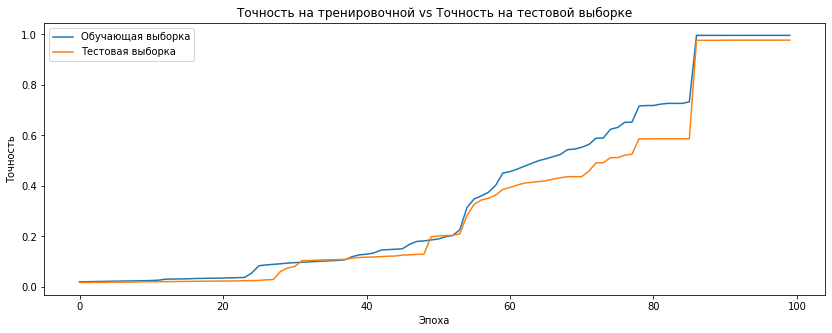

In [221]:
fig = plt.figure(figsize=(14,5))
plt.plot(accuracies['train'], label='Обучающая выборка')
plt.plot(accuracies['test'], label='Тестовая выборка')

plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.title('Точность на тренировочной vs Точность на тестовой выборке')

plt.legend();

Вычислим precision, recall и f1-меру для обученной модели. Для этого сравним предсказанные моделью значения с истинными метками и воспользуемся методом отчета из `sklearn`.

In [219]:
model.eval()
with torch.no_grad():
    out = model(data)
    pred = out.argmax(dim=1) # извлекаем предсказания модели для каждого объекта данных
    y_true = data.y[test_mask].cpu().numpy()
    y_pred = pred[test_mask].cpu().numpy()
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    conf_mat = confusion_matrix(data.y.cpu().numpy(), pred.cpu().numpy())

print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}')

Precision: 1.00, Recall: 0.98, F1: 0.99


Исходя из итоговых метрик точности, precision, recall и f1, можно сделать вывод, что модель имеет высокую точность на тестовых данных, что свидетельствует о её эффективности в работе. Однако, необходимо учитывать несбалансированность датасета, что может исказить результаты.

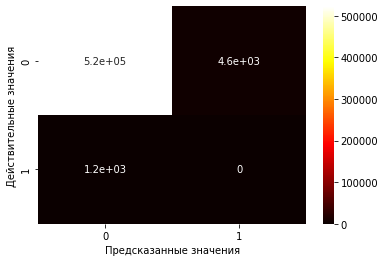

In [142]:
import seaborn as sns

class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(conf_mat,
            cmap='hot',
            annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения');

## Графовая сеть внимания

In [145]:
from torch_geometric.nn import GATConv

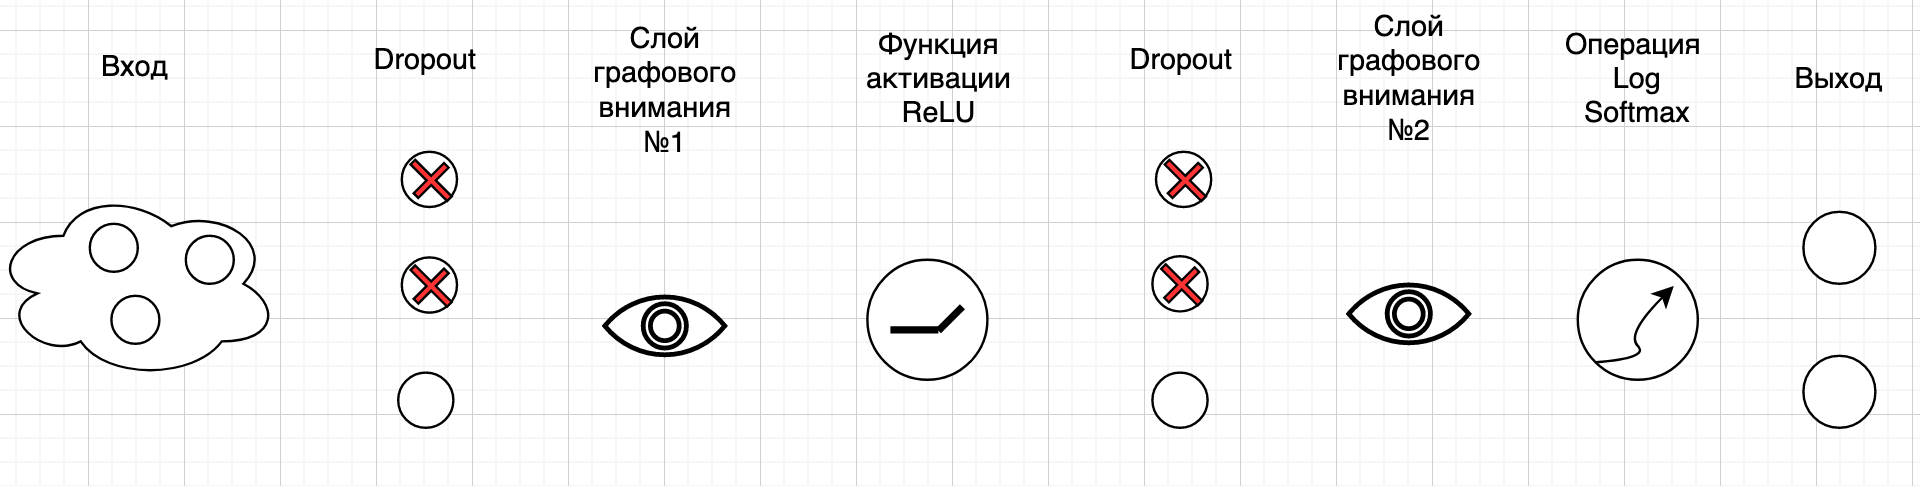

In [203]:
class GAT(torch.nn.Module):
    def __init__(self, data, heads_layer1, heads_layer2, dropout):
        super().__init__()
        self.dropout = dropout
        num_features = data.num_features
        num_classes = len(data.y.unique())

        self.conv1 = GATConv(in_channels=num_features, out_channels=8,
                             heads=heads_layer1, concat=True, negative_slope=0.2, 
                             dropout=dropout)

        self.conv2 = GATConv(in_channels=8*heads_layer1, out_channels=num_classes, 
                             heads=heads_layer2, concat=False, negative_slope=0.2,
                             dropout=dropout)
  
    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.edge_attr
        
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv1(x, edge_index, edge_attr)
        x = F.elu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index, edge_attr)
      
        return F.log_softmax(x, dim=1)

In [204]:
def train(model, data, optimizer):
    model.train() 
    optimizer.zero_grad() 

    log_softmax = model(data) 
    nll_loss = F.nll_loss(log_softmax[train_mask], data.y[train_mask])
    nll_loss.backward()
    optimizer.step() 

def compute_accuracy(model, data, mask):
    model.eval()
    logprob = model(data)
    _, y_pred = logprob[mask].max(dim=1)
    y_true = data.y[mask]
    acc = y_pred.eq(y_true).sum()/ mask.sum().float()
    return acc.item()

@torch.no_grad() 
def test(model, data):
    acc_train = compute_accuracy(model, data, train_mask)
    acc_test = compute_accuracy(model, data, test_mask)

    return acc_train, acc_test

In [211]:
%%time

model_gat = GAT(data=data, heads_layer1=2, heads_layer2=2, dropout=0.6).to(device)
optimizer_gat = torch.optim.Adam(model_gat.parameters(), lr=0.001)

accuracies_gat = {'train': [], 'test': []}
for epoch in range(1, 101):
    train(model_gat, data, optimizer_gat)
    train_acc, test_acc = test(model_gat, data)
    accuracies_gat['train'].append(train_acc)
    accuracies_gat['test'].append(test_acc)
    if epoch % 11 == 1:
        print(f'Epoch: {epoch}, Train: {train_acc:.2f}, Test: {test_acc:.2f}')

Epoch: 1, Train: 0.43, Test: 0.26
Epoch: 12, Train: 0.50, Test: 0.37
Epoch: 23, Train: 0.84, Test: 0.85
Epoch: 34, Train: 0.88, Test: 0.87
Epoch: 45, Train: 0.90, Test: 0.88
Epoch: 56, Train: 0.91, Test: 0.94
Epoch: 67, Train: 0.92, Test: 0.94
Epoch: 78, Train: 0.92, Test: 0.94
Epoch: 89, Train: 0.92, Test: 0.94
Epoch: 100, Train: 0.96, Test: 0.96
CPU times: user 14min 8s, sys: 7min, total: 21min 8s
Wall time: 5min 39s


In [218]:
model_gat.eval()
with torch.no_grad():
    out = model_gat(data)
    pred = out.argmax(dim=1) # извлекаем предсказания модели для каждого объекта данных
    y_true = data.y[test_mask].cpu().numpy()
    y_pred = pred[test_mask].cpu().numpy()
    precision_gat, recall_gat, f1_gat, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    conf_mat = confusion_matrix(data.y.cpu().numpy(), pred.cpu().numpy())

print(f'Precision: {precision_gat:.2f}, Recall: {recall_gat:.2f}, F1: {f1_gat:.2f}')

Precision: 1.00, Recall: 0.96, F1: 0.98


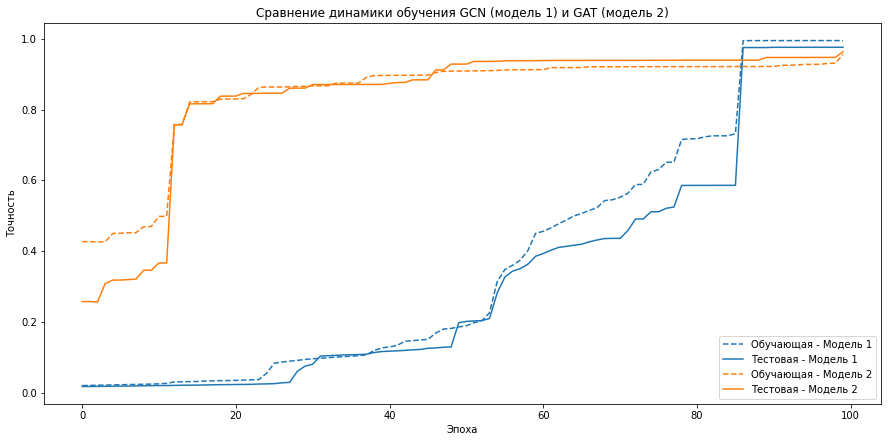

In [217]:
fig, ax = plt.subplots(figsize=(15, 7))

colors = ['#1f77b4', '#ff7f0e']

for i, perf in enumerate([accuracies, accuracies_gat]): # словари с accuracies двух моделей
    ax.plot(perf['train'], color=colors[i], linestyle='--', label=f'Обучающая - Модель {i+1}')
    ax.plot(perf['test'], color=colors[i], linestyle='-', label=f'Тестовая - Модель {i+1}')

ax.set_title('Сравнение динамики обучения GCN (модель 1) и GAT (модель 2)')
ax.set_xlabel('Эпоха')
ax.set_ylabel('Точность')
ax.legend(loc='lower right');

Таким образом, более сложная архитектура графовой нейронной сети внимания раньше свёрточной начала находить закономерности в данных и уже на 20 эпохе имела accuracy более 0.8. Однако, достигнув 0.92, точность на обоих выборках у GAT почти не изменялась. Кроме того, по превышению тестового accuracy над тренировочным, можно сделать вывод, что GAT переобучилась.

Сравнение других метрик эффективностей:

In [220]:
pd.DataFrame({'GCN': [precision, recall, f1], 'GAT': [precision_gat, recall_gat, f1_gat]}, 
             index=['Precision', 'Recall', 'F1-score'])

,GCN,GAT
Precision,0.999715,0.999719
Recall,0.976795,0.964362
F1-score,0.988122,0.981720


Таким образом, архитектурно более простая графовая свёрточная нейронная сеть показывает результаты лучше, чем графовая сеть внимания.
Более низкий recall по сравнению с accuracy и precision может говорить о том, что модели более склонна к ошибке false negatives, то есть классифицирует аккаунты неверно как "хорошие", когда на самом деле они являются фишинговыми. Это связано с тем, что модели используют недостаточно сложную и несбалансированную выборку для обучения. 

Подводя итог процессу создания модели глубокого обучения для классификации фишинговых криптовалютных аккаунтов необходимо сделать следующие выводы:
    
1. Данные, хранимые в виде графа, удобно обрабатывать и исследовать с помощью библиотеки NetworkX
2. Транзакционный граф Ethereum, в виду своего масштаба представляет из себя крайне несбалансированный набор данных, соотношение классов в котором должно быть выравнено путём удаления большого числа экземпляров данных (которые выбираются классическими графовыми алгоритмами, например такими как поиск сообществ).
3. В качестве класса модели машинного обучения на графах наиболее оптимальном являются графовые нейронные сети.
4. Для начала обучения необходимо "перевести" граф в набор тензоров смежности/инцидентности и атрибутов аккаунтов и транзакций.
5. Библиотека PyTorch Geometric предоставляет наиболее известные реализации слоёв для графовых нейронных сетей - необходимо лишь структурированно (в требуемом формате) передать в них данные о графе.
6. Графовая свёрточная нейронная сеть показывает лучшие результаты по итогам обучения, однако они были получены на крайне малом числе примеров фишинговых узлов, по сравнению с обычными адресами Ethereum.